<a href="https://colab.research.google.com/github/titilomt/data_science_puc_projects/blob/master/nb_nlp_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
"""
!pip install gensim
!pip install umap-learn
!pip install wikipedia
!pip install unidecode
"""
!pip install gensim
!pip install umap-learn
!pip install wikipedia
!pip install unidecode

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=cf5cde9b09275f7df506e6365aac2acbc0da1c800951fa2c2b31d36e7bbf9941
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
     |████████████████████████████████| 245kB 3.4MB/s 


In [11]:
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
import wikipedia
import string
from unidecode import unidecode
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import urllib.request
import bz2
import gensim
import warnings
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Definição do Corpus

## Base

In [6]:
wikipedia.set_lang("pt")
bh = wikipedia.page("Belo Horizonte")

In [7]:
corpus = bh.content

In [8]:
print(corpus)

Belo Horizonte (pron. [bɛloɾiˈzõntʃi]) é um município brasileiro e a capital do estado de Minas Gerais. Sua população estimada é de 2 501 576 habitantes, conforme estimativas do Instituto Brasileiro de Geografia e Estatística (IBGE), sendo o 6º município mais populoso do país, o terceiro mais populoso da Região Sudeste e o mais populoso de seu estado. Com uma área de aproximadamente 331 km², possui uma geografia diversificada, com morros e baixadas. Com uma distância de 716 quilômetros de Brasília, a capital federal, é a segunda capital de estado mais próxima da capital nacional, atrás apenas de Goiânia.Cercada pela Serra do Curral, que lhe serve de moldura natural e referência histórica, foi planejada e construída para ser a capital política e administrativa do estado mineiro sob influência das ideias do positivismo, num momento de forte apelo da ideologia republicana no país. Sofreu um inesperado acelerado crescimento populacional, chegando a mais de um milhão de habitantes com quase

Selecionamos algumas frases do corpus de BH da wikipedia.

Conside a lista abaixo como nosso corpus de documentos. Cada elemento da lista, considere como um único documento.

In [9]:
documentos = \
["Belo Horizonte é um município brasileiro e a capital do estado de Minas Gerais",
"A populacao de Belo Horizonte é estimada em 2 501 576 habitantes, conforme estimativas do Instituto Brasileiro de Geografia e Estatística",
"Belo Horizonte já foi indicada pelo Population Crisis Commitee, da ONU, como a metrópole com melhor qualidade de vida na América Latina",
"Belo Horizonte é mundialmente conhecida e exerce significativa influência nacional e até internacional, seja do ponto de vista cultural, econômico ou político",
"Belo Horizonte é a capital do segundo estado mais populoso do Brasil, Minas Gerais"]

## Preprocessamento

<b> Atividade </b>

1) Escreva uma método que realiza o pré-processamento da lista de <b>documentos</b>.

O método deve, para cada documento:
- tokenizar cada palavra
- remover stopwords
- remover números
- remover pontuções
- remover acentos
- aplicar lower

In [12]:
stopwords.words("portuguese")

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [13]:
def pre_processamento_texto(corpus):
    corpus_alt  = re.findall(r"\w+(?:'\w+')?|[^\w\s]",corpus)
    corpus_alt  = [t.lower() for t in corpus_alt] 
    lista_stops = stopwords.words("portuguese")
    corpus_alt  = [token for token in corpus_alt if token not in lista_stops]
    corpus_alt  = [re.sub(r"\d","", token) for token in corpus_alt]
    corpus_alt  = [token for token in corpus_alt if token not in string.punctuation]
    corpus_alt  = [unidecode(token) for token in corpus_alt]
    return corpus_alt

In [14]:
len(documentos)

5

In [15]:
pre_processamento_texto(documentos[0])

['belo',
 'horizonte',
 'municipio',
 'brasileiro',
 'capital',
 'estado',
 'minas',
 'gerais']

In [16]:
corpus_processado = [pre_processamento_texto(doc) for doc in documentos]

In [17]:
corpus_processado 

[['belo',
  'horizonte',
  'municipio',
  'brasileiro',
  'capital',
  'estado',
  'minas',
  'gerais'],
 ['populacao',
  'belo',
  'horizonte',
  'estimada',
  'habitantes',
  'conforme',
  'estimativas',
  'instituto',
  'brasileiro',
  'geografia',
  'estatistica'],
 ['belo',
  'horizonte',
  'indicada',
  'population',
  'crisis',
  'commitee',
  'onu',
  'metropole',
  'melhor',
  'qualidade',
  'vida',
  'america',
  'latina'],
 ['belo',
  'horizonte',
  'mundialmente',
  'conhecida',
  'exerce',
  'significativa',
  'influencia',
  'nacional',
  'internacional',
  'ponto',
  'vista',
  'cultural',
  'economico',
  'politico'],
 ['belo',
  'horizonte',
  'capital',
  'segundo',
  'estado',
  'populoso',
  'brasil',
  'minas',
  'gerais']]

# Representação Textual

## N-grams

Existem várias formas de calcular os N-grams.

Iremos estudar o: Phrases do gensim e o ngrams do NLTK

### NLTK

Para retornar o ngrams do nltk, utilize o exemplo abaixo:

```python
list(ngrams(corpus, 2)
```

<b> Atividade </b>

2) Faça um código para armazena os bigrams de cada documento do corpus <b>corpus_processado</b> na variável corpus_ngrams_nltk.
Depois imprima os bigramas de cada documento

In [18]:
corpus_processado[0] 

['belo',
 'horizonte',
 'municipio',
 'brasileiro',
 'capital',
 'estado',
 'minas',
 'gerais']

In [19]:
list(ngrams(corpus_processado[0] , 2))

[('belo', 'horizonte'),
 ('horizonte', 'municipio'),
 ('municipio', 'brasileiro'),
 ('brasileiro', 'capital'),
 ('capital', 'estado'),
 ('estado', 'minas'),
 ('minas', 'gerais')]

In [20]:
corpus_ngrams_nltk =  [list(ngrams(doc , 2)) for doc in corpus_processado]

In [21]:
corpus_ngrams_nltk

[[('belo', 'horizonte'),
  ('horizonte', 'municipio'),
  ('municipio', 'brasileiro'),
  ('brasileiro', 'capital'),
  ('capital', 'estado'),
  ('estado', 'minas'),
  ('minas', 'gerais')],
 [('populacao', 'belo'),
  ('belo', 'horizonte'),
  ('horizonte', 'estimada'),
  ('estimada', 'habitantes'),
  ('habitantes', 'conforme'),
  ('conforme', 'estimativas'),
  ('estimativas', 'instituto'),
  ('instituto', 'brasileiro'),
  ('brasileiro', 'geografia'),
  ('geografia', 'estatistica')],
 [('belo', 'horizonte'),
  ('horizonte', 'indicada'),
  ('indicada', 'population'),
  ('population', 'crisis'),
  ('crisis', 'commitee'),
  ('commitee', 'onu'),
  ('onu', 'metropole'),
  ('metropole', 'melhor'),
  ('melhor', 'qualidade'),
  ('qualidade', 'vida'),
  ('vida', 'america'),
  ('america', 'latina')],
 [('belo', 'horizonte'),
  ('horizonte', 'mundialmente'),
  ('mundialmente', 'conhecida'),
  ('conhecida', 'exerce'),
  ('exerce', 'significativa'),
  ('significativa', 'influencia'),
  ('influencia', 'n

In [22]:
for i in range(0,len(corpus_processado)):
    print("Documento",i)
    print(corpus_ngrams_nltk[i])
    print("\n")

Documento 0
[('belo', 'horizonte'), ('horizonte', 'municipio'), ('municipio', 'brasileiro'), ('brasileiro', 'capital'), ('capital', 'estado'), ('estado', 'minas'), ('minas', 'gerais')]


Documento 1
[('populacao', 'belo'), ('belo', 'horizonte'), ('horizonte', 'estimada'), ('estimada', 'habitantes'), ('habitantes', 'conforme'), ('conforme', 'estimativas'), ('estimativas', 'instituto'), ('instituto', 'brasileiro'), ('brasileiro', 'geografia'), ('geografia', 'estatistica')]


Documento 2
[('belo', 'horizonte'), ('horizonte', 'indicada'), ('indicada', 'population'), ('population', 'crisis'), ('crisis', 'commitee'), ('commitee', 'onu'), ('onu', 'metropole'), ('metropole', 'melhor'), ('melhor', 'qualidade'), ('qualidade', 'vida'), ('vida', 'america'), ('america', 'latina')]


Documento 3
[('belo', 'horizonte'), ('horizonte', 'mundialmente'), ('mundialmente', 'conhecida'), ('conhecida', 'exerce'), ('exerce', 'significativa'), ('significativa', 'influencia'), ('influencia', 'nacional'), ('naci

### Phrases - Gensim

Forma mais inteligente de calcular os bigrams. Ela calcula os bigramas levando em consideração a frequência do par das palavaras em todos os documentos.
Para isso ele treina um modelo e depois aplica no corpus.

```python
#treinamento bigrams
model_corpus_phrases = gensim.models.Phrases(corpus_processado, min_count=1)
#calulando os bigrams do corpus processado
bigram_corpus = model_corpus_phrases[corpus_processado]
```

<b> Atividade </b>

3) Faça um código que treine os bigrams, sendo que o <b>min_count = 1</b>. 
O <b>min_count</b> é a contagem mínima que aquele par de palavras deve aparecer junto para considerarmos com um token. Teste também com outros valores de mim_count. Depois imprima os bigramas de cada documento.
Use o corpus_processado.

In [23]:
## 
# Treinando bigrams com modelo gensin

model_corpus_phrases = gensim.models.Phrases(corpus_processado, min_count=1)
bigram_corpus = model_corpus_phrases[corpus_processado]

In [24]:
for i in range(0,len(bigram_corpus)):
    print("Documento",i)
    print(bigram_corpus[i])
    print("\n")

Documento 0
['belo_horizonte', 'municipio', 'brasileiro', 'capital', 'estado', 'minas_gerais']


Documento 1
['populacao', 'belo_horizonte', 'estimada', 'habitantes', 'conforme', 'estimativas', 'instituto', 'brasileiro', 'geografia', 'estatistica']


Documento 2
['belo_horizonte', 'indicada', 'population', 'crisis', 'commitee', 'onu', 'metropole', 'melhor', 'qualidade', 'vida', 'america', 'latina']


Documento 3
['belo_horizonte', 'mundialmente', 'conhecida', 'exerce', 'significativa', 'influencia', 'nacional', 'internacional', 'ponto', 'vista', 'cultural', 'economico', 'politico']


Documento 4
['belo_horizonte', 'capital', 'segundo', 'estado', 'populoso', 'brasil', 'minas_gerais']




In [25]:
bigram_corpus[0]

['belo_horizonte',
 'municipio',
 'brasileiro',
 'capital',
 'estado',
 'minas_gerais']

## TD-IDF

Dica de leitura: https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XklQxnVKj7c

Para representar o texto com TF-IDF utilizamos o TfidfVectorizer. A seguir apresentamos instruções sobre como utilizá-lo.

```python
#primeiro criamos o objeto
vect = TfidfVectorizer()
vect #aqui você pode observa todos os parâmetros que o objeto possui
## Existem alguns parâmetros, opcionais, que podemos informar para uma possível melhora do nosso modelo. Por exemplo:
### inclui 1-grams e 2-grams
vect.set_params(ngram_range=(1, 2))
### ignora termos que a aparecem em mais de 50% dos documentoss
vect.set_params(max_df=0.5)
### só considero termos que aparecem em ao menos 2 documentos
vect.set_params(min_df=2)

#depois aplicamos fit_transform para transformar o texto em números
docs_tdidf = vect.fit_transform(docs)

#o docs_tdidf é uma matriz com os números que representam cada um dos textos. 
## Conseguimos verificar a dimensão desta matriz:
print(docs_tdidf.shape)

#Para visualizar as features capturadas pelo TF-IDF utilize:
print(vect.get_feature_names())
#Para visualizar os vetores correspondentes a cada palavara utilize:
df = pd.DataFrame(docs_tdidf.T.todense(), index=vect.get_feature_names(), columns=["doc"+str(i+1) for i in range(0,len(docs))])
df
```

<b> Atividade: </b>

4) Faça o TDIFTVectorizer nos documentos da variável <b>documentos</b> sem alterar nenhum parâmetro. 

In [28]:
vect = TfidfVectorizer()

In [29]:
docs_tdidf = vect.fit_transform(documentos)

In [30]:
docs_tdidf

<5x59 sparse matrix of type '<class 'numpy.float64'>'
	with 78 stored elements in Compressed Sparse Row format>

In [31]:
vect.get_feature_names()

['501',
 '576',
 'américa',
 'até',
 'belo',
 'brasil',
 'brasileiro',
 'capital',
 'com',
 'commitee',
 'como',
 'conforme',
 'conhecida',
 'crisis',
 'cultural',
 'da',
 'de',
 'do',
 'econômico',
 'em',
 'estado',
 'estatística',
 'estimada',
 'estimativas',
 'exerce',
 'foi',
 'geografia',
 'gerais',
 'habitantes',
 'horizonte',
 'indicada',
 'influência',
 'instituto',
 'internacional',
 'já',
 'latina',
 'mais',
 'melhor',
 'metrópole',
 'minas',
 'mundialmente',
 'município',
 'na',
 'nacional',
 'onu',
 'ou',
 'pelo',
 'político',
 'ponto',
 'populacao',
 'population',
 'populoso',
 'qualidade',
 'segundo',
 'seja',
 'significativa',
 'um',
 'vida',
 'vista']

In [32]:
pd.DataFrame(docs_tdidf.todense(),columns = vect.get_feature_names())

,501,576,américa,até,belo,brasil,brasileiro,capital,com,commitee,como,conforme,conhecida,crisis,cultural,da,de,do,econômico,em,estado,estatística,estimada,estimativas,exerce,foi,geografia,gerais,habitantes,horizonte,indicada,influência,instituto,internacional,já,latina,mais,melhor,metrópole,minas,mundialmente,município,na,nacional,onu,ou,pelo,político,ponto,populacao,population,populoso,qualidade,segundo,seja,significativa,um,vida,vista
0,0.00000,0.00000,0.000000,0.000000,0.189192,0.000000,0.320330,0.320330,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.223686,0.223686,0.000000,0.00000,0.320330,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.320330,0.00000,0.189192,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320330,0.000000,0.397041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.397041,0.000000,0.000000
1,0.27025,0.27025,0.000000,0.000000,0.128776,0.000000,0.218036,0.000000,0.000000,0.000000,0.000000,0.27025,0.000000,0.000000,0.000000,0.000000,0.304509,0.152254,0.000000,0.27025,0.000000,0.27025,0.27025,0.27025,0.000000,0.000000,0.27025,0.000000,0.27025,0.128776,0.000000,0.000000,0.27025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.27025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.00000,0.230808,0.000000,0.109981,0.000000,0.000000,0.000000,0.230808,0.230808,0.230808,0.00000,0.000000,0.230808,0.000000,0.230808,0.130033,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.230808,0.00000,0.000000,0.00000,0.109981,0.230808,0.000000,0.00000,0.000000,0.230808,0.230808,0.000000,0.230808,0.230808,0.000000,0.000000,0.000000,0.230808,0.000000,0.230808,0.000000,0.230808,0.000000,0.000000,0.00000,0.230808,0.000000,0.230808,0.000000,0.000000,0.000000,0.000000,0.230808,0.000000
3,0.00000,0.00000,0.000000,0.249308,0.118797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.249308,0.000000,0.249308,0.000000,0.140456,0.140456,0.249308,0.00000,0.000000,0.00000,0.00000,0.00000,0.249308,0.000000,0.00000,0.000000,0.00000,0.118797,0.000000,0.249308,0.00000,0.249308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249308,0.000000,0.000000,0.249308,0.000000,0.249308,0.000000,0.249308,0.249308,0.00000,0.000000,0.000000,0.000000,0.000000,0.249308,0.249308,0.000000,0.000000,0.249308
4,0.00000,0.00000,0.000000,0.000000,0.165125,0.346534,0.000000,0.279581,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390462,0.000000,0.00000,0.279581,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.279581,0.00000,0.165125,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.346534,0.000000,0.000000,0.279581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.346534,0.000000,0.346534,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

<b> Atividade </b>

5) Imprima o shape do resultado da atividade 4

In [34]:
docs_tdidf.shape

(5, 59)

<b> Atividade </b>

6) Imprima as features capturadas em 4.

In [35]:
vect.get_feature_names()

['501',
 '576',
 'américa',
 'até',
 'belo',
 'brasil',
 'brasileiro',
 'capital',
 'com',
 'commitee',
 'como',
 'conforme',
 'conhecida',
 'crisis',
 'cultural',
 'da',
 'de',
 'do',
 'econômico',
 'em',
 'estado',
 'estatística',
 'estimada',
 'estimativas',
 'exerce',
 'foi',
 'geografia',
 'gerais',
 'habitantes',
 'horizonte',
 'indicada',
 'influência',
 'instituto',
 'internacional',
 'já',
 'latina',
 'mais',
 'melhor',
 'metrópole',
 'minas',
 'mundialmente',
 'município',
 'na',
 'nacional',
 'onu',
 'ou',
 'pelo',
 'político',
 'ponto',
 'populacao',
 'population',
 'populoso',
 'qualidade',
 'segundo',
 'seja',
 'significativa',
 'um',
 'vida',
 'vista']

7) Imprima os vetores correspondentes a cada palavra de cada documento.

In [36]:
pd.DataFrame(docs_tdidf.todense(),columns = vect.get_feature_names())

,501,576,américa,até,belo,brasil,brasileiro,capital,com,commitee,como,conforme,conhecida,crisis,cultural,da,de,do,econômico,em,estado,estatística,estimada,estimativas,exerce,foi,geografia,gerais,habitantes,horizonte,indicada,influência,instituto,internacional,já,latina,mais,melhor,metrópole,minas,mundialmente,município,na,nacional,onu,ou,pelo,político,ponto,populacao,population,populoso,qualidade,segundo,seja,significativa,um,vida,vista
0,0.00000,0.00000,0.000000,0.000000,0.189192,0.000000,0.320330,0.320330,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.223686,0.223686,0.000000,0.00000,0.320330,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.320330,0.00000,0.189192,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320330,0.000000,0.397041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.397041,0.000000,0.000000
1,0.27025,0.27025,0.000000,0.000000,0.128776,0.000000,0.218036,0.000000,0.000000,0.000000,0.000000,0.27025,0.000000,0.000000,0.000000,0.000000,0.304509,0.152254,0.000000,0.27025,0.000000,0.27025,0.27025,0.27025,0.000000,0.000000,0.27025,0.000000,0.27025,0.128776,0.000000,0.000000,0.27025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.27025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.00000,0.230808,0.000000,0.109981,0.000000,0.000000,0.000000,0.230808,0.230808,0.230808,0.00000,0.000000,0.230808,0.000000,0.230808,0.130033,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.230808,0.00000,0.000000,0.00000,0.109981,0.230808,0.000000,0.00000,0.000000,0.230808,0.230808,0.000000,0.230808,0.230808,0.000000,0.000000,0.000000,0.230808,0.000000,0.230808,0.000000,0.230808,0.000000,0.000000,0.00000,0.230808,0.000000,0.230808,0.000000,0.000000,0.000000,0.000000,0.230808,0.000000
3,0.00000,0.00000,0.000000,0.249308,0.118797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.249308,0.000000,0.249308,0.000000,0.140456,0.140456,0.249308,0.00000,0.000000,0.00000,0.00000,0.00000,0.249308,0.000000,0.00000,0.000000,0.00000,0.118797,0.000000,0.249308,0.00000,0.249308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249308,0.000000,0.000000,0.249308,0.000000,0.249308,0.000000,0.249308,0.249308,0.00000,0.000000,0.000000,0.000000,0.000000,0.249308,0.249308,0.000000,0.000000,0.249308
4,0.00000,0.00000,0.000000,0.000000,0.165125,0.346534,0.000000,0.279581,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390462,0.000000,0.00000,0.279581,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.279581,0.00000,0.165125,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.346534,0.000000,0.000000,0.279581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.346534,0.000000,0.346534,0.000000,0.000000,0.000000,0.000000,0.000000


<b> Atividade </b>

8) Depois repita os itens 4,5,6 e 7 aplicando a alteração de parâmetros

In [38]:
### Incluí 1-grams e 2-grams
vect.set_params(ngram_range=(1, 2))
### Ignora termos que a aparecem em mais de 50% dos documentoss
vect.set_params(max_df=0.5)
### Termos que aparecem em ao menos 2 documentos
vect.set_params(min_df=2)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [39]:
docs_tdidf = vect.fit_transform(documentos)

In [40]:
docs_tdidf.shape

(5, 7)

In [41]:
vect.get_feature_names()

['brasileiro',
 'capital',
 'capital do',
 'estado',
 'gerais',
 'minas',
 'minas gerais']

In [42]:
pd.DataFrame(docs_tdidf.todense(),columns = vect.get_feature_names())

,brasileiro,capital,capital do,estado,gerais,minas,minas gerais
0,0.377964,0.377964,0.377964,0.377964,0.377964,0.377964,0.377964
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248


## Bag of Words

Para representar o bag of words utilizamos o CountVectorizer

```python
#primeiro criamos o objeto
vect_bag = CountVectorizer(binary=True) #se binary = False -> ocorre a contagem da frequência em que a palavra aparece
vect_bag #imprime os parâmetros

```

<b> Atividade </b>

9) Faça o CountVectorizer nos documentos da variável <b>documentos</b> considerando binary = True

In [43]:
#primeiro criamos o objeto
vect_bag = CountVectorizer(binary=True) #se binary = False -> ocorre a contagem da frequência em que a palavra aparece
vect_bag #imprime os parâmetros

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [44]:
vetor_bow = vect_bag.fit_transform(documentos)

In [45]:
vetor_bow

<5x59 sparse matrix of type '<class 'numpy.int64'>'
	with 78 stored elements in Compressed Sparse Row format>

<b> Atividade </b>

10) Imprima o índice correspondente a cada token da lista retornada por vect_bag.get_feature_names()

In [46]:
pd.DataFrame(vect_bag.get_feature_names())

,0
0,501
1,576
2,américa
3,até
4,belo
5,brasil
6,brasileiro
7,capital
8,com
9,commitee


<b> Atividade </b>

11) Observe cada palavra do primeiro documento da vairável documents (documents[0]) e o vetor retornado para este mesmo documento 
(docs_bag.todense()[0]).

Com o resultado da célula anterior, check se as posições preenchidas com '1' são as posições que representam cada uma das palavras do docs[0].
Observe que é o bag of Words que vimos em sala.

In [47]:
documentos[0]

'Belo Horizonte é um município brasileiro e a capital do estado de Minas Gerais'

In [48]:
pd.DataFrame(vetor_bow.todense(),columns = vect_bag.get_feature_names())

,501,576,américa,até,belo,brasil,brasileiro,capital,com,commitee,como,conforme,conhecida,crisis,cultural,da,de,do,econômico,em,estado,estatística,estimada,estimativas,exerce,foi,geografia,gerais,habitantes,horizonte,indicada,influência,instituto,internacional,já,latina,mais,melhor,metrópole,minas,mundialmente,município,na,nacional,onu,ou,pelo,político,ponto,populacao,population,populoso,qualidade,segundo,seja,significativa,um,vida,vista
0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


## Embedding

### Utilizando um embedding treinado

<b> Atividade </b>

12) Faça download do seguinte arquivo, realize a leitura deste arquivo e carregue o modelo: 
https://drive.google.com/open?id=1zI8pGfbUHuU_0wY_FV4tD6w6ZCUJTQbh


O código abaixo é um exmplo de como ler o arquivo que você fez download.

```python
newfilepath = "embedding_wiki_100d_pt.txt"
filepath = "ptwiki_20180420_100d.txt.bz2"
with open(newfilepath, 'wb') as new_file, bz2.BZ2File(filepath, 'rb') as file:
    for data in iter(lambda : file.read(100 * 1024), b''):
        new_file.write(data)
        
#carregar
word_vectors = gensim.models.KeyedVectors.load_word2vec_format(newfilepath, binary=False)
```

<b> Dica </b> Use %%time para capturar o tempo de execução em cada célula.

In [51]:
newfilepath = "embedding_wiki_100d_pt.txt"
filepath = "/tmp/ptwiki_20180420_100d.txt.bz2"
with open(newfilepath, 'wb') as new_file, bz2.BZ2File(filepath, 'rb') as file:
    for data in iter(lambda : file.read(100 * 1024), b''):
        new_file.write(data)


EOFError: ignored

In [ ]:
word_vectors = gensim.models.KeyedVectors.load_word2vec_format("embedding_wiki_100d_pt.txt", binary=False)

In [ ]:
word_vectors

<b> Atividade </b>

13) Imprima os vetores das palavras "nlp" e "computacao"

```python
#exemplo de retorno do vetor
word_vectors[__]
```

In [ ]:
word_vectors["nlp"]


array([ 0.8528,  0.1094, -0.0296, -0.0458, -0.2029, -0.1839, -0.2012,
       -0.111 , -0.0315,  0.1895, -0.2194, -0.3496, -0.1319, -0.1594,
        0.1549, -0.493 ,  0.1897, -0.296 ,  0.0026,  0.2015,  0.0215,
        0.2946, -0.2024,  0.3931,  0.143 ,  0.0667, -0.4868,  0.048 ,
       -0.1028,  0.2372,  0.2042, -0.8025, -0.1221,  0.475 , -0.2997,
        0.219 ,  0.1232, -0.2118,  0.5402, -0.0768,  0.2253,  0.1285,
       -0.6157,  0.1777,  0.0306, -0.1094, -0.1649, -0.386 , -0.2692,
        0.3149,  0.0391, -0.0821, -0.2238,  0.033 ,  0.5032,  0.0836,
        0.1834, -0.2009, -0.0722, -0.1744,  0.3946, -0.0792, -0.0863,
        0.3813,  0.5876, -0.4447, -0.5435,  0.1528, -0.1012, -0.0967,
       -0.2621,  0.4737,  0.3235, -1.1013, -0.0789,  0.1945, -0.1304,
       -0.0379,  0.899 ,  0.0398,  0.2908, -0.4276, -0.0641, -0.3841,
        0.354 ,  0.4139,  0.1076, -0.3439, -0.1474, -0.1215,  0.4359,
       -0.1563,  0.2577,  0.4333,  0.2003, -0.4064, -0.818 ,  0.0812,
       -0.2554, -0.4

In [ ]:
word_vectors["computação"]

array([ 0.8925,  0.1098, -0.1149, -0.0027, -0.3465, -0.5141,  0.1407,
       -0.1056,  0.1833,  0.7828, -0.4058, -0.4498, -0.397 , -0.0735,
        0.4506, -0.0332,  0.6366,  0.3881,  0.3214,  0.2328, -0.3817,
        0.5392,  0.3512,  0.4598,  0.1595,  0.0346, -0.5342, -0.27  ,
       -0.3138,  0.8061,  0.6218,  0.3386,  0.3551, -0.0421, -0.6907,
       -0.8062,  0.2255,  0.0551,  0.1962, -0.7308, -0.5294,  0.1622,
       -0.8377, -0.3827,  0.4446,  0.5529,  0.1036, -0.6277, -0.0667,
        0.6789, -0.495 ,  0.3896, -0.9315, -0.1443,  0.0663, -0.1259,
        0.296 , -0.1958, -0.2049, -0.0858,  0.8562, -0.8337, -0.3848,
        0.4907, -0.0818, -0.1193,  0.0587,  0.5593,  0.62  , -0.0066,
       -0.8459, -0.0201,  0.0155, -0.6336,  0.0514,  0.3078, -0.6017,
       -0.0198,  0.1701,  0.3448, -0.2039, -0.2232, -0.8986, -0.0839,
        0.0135,  0.3635,  0.1186, -0.4698,  0.1051, -0.1011,  0.8797,
        0.1271,  0.3802,  0.494 ,  0.4224, -0.4272, -0.8867, -0.1705,
       -0.6998,  0.0

In [ ]:
len(word_vectors.vocab)

1055544

<b> Similaridade de Vetores </b> 

No gensim é possível realizar a similaridade utilizando o seguinte método:

```python
word_vectors.most_similar(___)
```

<b> Atividade </b>

14) Verifique a similaridade das seguintes palavras: elizabete, raiva, segunda, dois, computação.

In [ ]:
word_vectors.most_similar("elizabete",topn=30)

[('joana', 0.7828384041786194),
 ('elídia', 0.7808018326759338),
 ('arcângela', 0.7692556381225586),
 ('maria', 0.7659809589385986),
 ('felisbela', 0.7649518251419067),
 ('andreza', 0.7636873722076416),
 ('thomazia', 0.7636218070983887),
 ('francisca', 0.7602137327194214),
 ('eleonora', 0.7596681118011475),
 ('deodata', 0.7594977021217346),
 ('higina', 0.7592427134513855),
 ('damásia', 0.7589161396026611),
 ('tercília', 0.7561761140823364),
 ('caetana', 0.7558072805404663),
 ('olenka', 0.7557264566421509),
 ('belisária', 0.7547156810760498),
 ('felizarda', 0.7544296979904175),
 ('felisberta', 0.7531611919403076),
 ('suzana', 0.7523881196975708),
 ('ildi', 0.7511358261108398),
 ('emerentina', 0.7509732842445374),
 ('beatriz', 0.7489091753959656),
 ('bonachella', 0.7488889694213867),
 ('gercina', 0.7487455010414124),
 ('buffara', 0.7487081289291382),
 ('ana', 0.7485848069190979),
 ('gasparina', 0.7474220991134644),
 ('ghira', 0.7463698983192444),
 ('nicota', 0.746188759803772),
 ('vitori

In [ ]:
word_vectors.most_similar("raiva")

[('medo', 0.8303433656692505),
 ('frustração', 0.8079832196235657),
 ('desespero', 0.8039345741271973),
 ('tristeza', 0.8006156086921692),
 ('remorso', 0.7922822833061218),
 ('desgosto', 0.7901228666305542),
 ('inveja', 0.781806468963623),
 ('ciúmes', 0.7798184752464294),
 ('ódio', 0.7763742208480835),
 ('repugnância', 0.7657582759857178)]

In [ ]:
word_vectors.most_similar("segunda")

[('primeira', 0.8965903520584106),
 ('quarta', 0.8717238903045654),
 ('terceira', 0.8408156037330627),
 ('última', 0.8141331672668457),
 ('sétima', 0.8071781992912292),
 ('sexta', 0.7998778820037842),
 ('décima', 0.7983245849609375),
 ('penúltima', 0.7719092965126038),
 ('nona', 0.7675511240959167),
 ('oitava', 0.7670223712921143)]

In [ ]:
word_vectors.most_similar("dois")

[('três', 0.8804982304573059),
 ('quatro', 0.8787742257118225),
 ('seis', 0.8449178338050842),
 ('cinco', 0.8440985083580017),
 ('oito', 0.8346582651138306),
 ('ambos', 0.82096266746521),
 ('nove', 0.8060351014137268),
 ('vários', 0.80522620677948),
 ('os', 0.8016588091850281),
 ('sete', 0.7854641079902649)]

In [ ]:
word_vectors.most_similar("computação")

[('computacional', 0.8587305545806885),
 ('informática', 0.806687593460083),
 ('microeletrônica', 0.7903156280517578),
 ('bioinspirada', 0.7866970300674438),
 ('computacionais', 0.7839764356613159),
 ('biomatemática', 0.7749572992324829),
 ('ubicomp', 0.7651089429855347),
 ('lamce', 0.7647030353546143),
 ('imecc', 0.7626293897628784),
 ('bioinformática', 0.7598603963851929)]

<b> Operação Vetorial</b>

Na aula teórica, estudamos sobre as operação entre os vetores. 
Agora vamos ver na prática:

```python
#exemplo:
word_vectors.wv.most_similar(positive=['mulher', 'rei'], negative=['homem'], topn=10)
```

<b>Atividade</b>

15) Execute o exemplo acima em uma célula e repita para os seguintes cenários:

- menino, menina, homem
- caminhada, andar, correr
- filho, filha, irmã
- pai, mãe, avô

<b> Reflita </b> as palavras similares fazem sentido?

In [ ]:
word_vectors.wv.most_similar(positive=['mulher', 'rei'], negative=['homem'], topn=10)

[('rainha', 0.8195168375968933),
 ('consorte', 0.7614859938621521),
 ('françae', 0.7443714141845703),
 ('teticheri', 0.7328506708145142),
 ('princesa', 0.731076717376709),
 ('esposa', 0.723304033279419),
 ('mutemuia', 0.7139753699302673),
 ('saovabha', 0.7129839658737183),
 ('coroação', 0.7080510854721069),
 ('sālote', 0.7042379379272461)]

In [ ]:
word_vectors.wv.most_similar(positive=['menino', 'menina'], negative=['homem'], topn=10)

[('garotinha', 0.7460257411003113),
 ('criança', 0.7124738693237305),
 ('izildinha', 0.6914386749267578),
 ('garota', 0.6765151023864746),
 ('órfã', 0.6759505271911621),
 ('filhinha', 0.6749871373176575),
 ('avó', 0.6711723804473877),
 ('babá', 0.662385106086731),
 ('irmãzinha', 0.6621854305267334),
 ('moça', 0.6594897508621216)]

In [ ]:
word_vectors.wv.most_similar(positive=['caminhar', 'andar'], negative=['correr'], topn=10)

[('pavimento', 0.658104419708252),
 ('terraço', 0.6280478239059448),
 ('térreo', 0.6278057098388672),
 ('banheiro', 0.6190707683563232),
 ('sentar', 0.6128964424133301),
 ('espaçoso', 0.6104312539100647),
 ('parlatório', 0.6031608581542969),
 ('piso', 0.5982044339179993),
 ('krisztinaváros', 0.5935234427452087),
 ('loggiato', 0.5917348265647888)]

In [ ]:
word_vectors.wv.most_similar(positive=['filho', 'filha'], negative=['irmã'], topn=10)

[('bisneto', 0.851236879825592),
 ('neto', 0.8316096067428589),
 ('primogênito', 0.8290098905563354),
 ('bisavô', 0.822635293006897),
 ('sobrinho', 0.8176089525222778),
 ('avô', 0.816977858543396),
 ('sogro', 0.8009151220321655),
 ('pai', 0.799014687538147),
 ('primogénito', 0.785844624042511),
 ('genro', 0.7755303382873535)]

In [ ]:
word_vectors.wv.most_similar(positive=['pai', 'mãe'], negative=['avô'], topn=10)

[('avó', 0.8150790929794312),
 ('adotiva', 0.8064451813697815),
 ('irmã', 0.79909348487854),
 ('esposa', 0.7982308268547058),
 ('madrasta', 0.7841061353683472),
 ('tia', 0.7805376052856445),
 ('falecida', 0.7775087356567383),
 ('eutímia', 0.7673025727272034),
 ('superprotegida', 0.7659645080566406),
 ('consternada', 0.7656984925270081)]

<b> Similaridade Palavras </b>

```python
#exemplo:
word_vectors.wv.similarity('mulher', 'homem')
```

<b> Atividade </b>

16) Verifique a similaridade entre as seguintes palavras:

- mulher, homem
- homem, mulher
- computação, computacao
- londres, homem

In [ ]:
word_vectors.wv.similarity('mulher', 'homem')

0.6771902

In [ ]:
word_vectors.wv.similarity('homem', 'mulher')

0.6771902

In [ ]:
word_vectors.wv.similarity('computação', 'computacao')

0.5200784

In [ ]:
word_vectors.wv.similarity('londres', 'homem')

0.28118974

### Treinando seu embedding

Aqui vamos utilizar o corpus machado. São textos/contos escritos por Machado de Assis.
Esse corpus é diponibilizado pelo NLTK.

In [ ]:
from nltk.corpus import machado

In [ ]:
machado.fileids()

['contos/macn001.txt',
 'contos/macn002.txt',
 'contos/macn003.txt',
 'contos/macn004.txt',
 'contos/macn005.txt',
 'contos/macn006.txt',
 'contos/macn007.txt',
 'contos/macn008.txt',
 'contos/macn009.txt',
 'contos/macn010.txt',
 'contos/macn011.txt',
 'contos/macn012.txt',
 'contos/macn013.txt',
 'contos/macn014.txt',
 'contos/macn015.txt',
 'contos/macn016.txt',
 'contos/macn017.txt',
 'contos/macn018.txt',
 'contos/macn019.txt',
 'contos/macn020.txt',
 'contos/macn021.txt',
 'contos/macn022.txt',
 'contos/macn023.txt',
 'contos/macn024.txt',
 'contos/macn025.txt',
 'contos/macn026.txt',
 'contos/macn027.txt',
 'contos/macn028.txt',
 'contos/macn029.txt',
 'contos/macn030.txt',
 'contos/macn031.txt',
 'contos/macn032.txt',
 'contos/macn033.txt',
 'contos/macn034.txt',
 'contos/macn035.txt',
 'contos/macn036.txt',
 'contos/macn037.txt',
 'contos/macn038.txt',
 'contos/macn039.txt',
 'contos/macn040.txt',
 'contos/macn041.txt',
 'contos/macn042.txt',
 'contos/macn043.txt',
 'contos/ma

In [ ]:
raw_casmurro = machado.raw('contos/macn001.txt')

In [ ]:
print(raw_casmurro)

Conto, Contos Fluminenses, 1870

Contos Fluminenses

Texto-fonte:

Obra Completa, Machado de Assis, vol. II,

Rio de Janeiro: Nova Aguilar, 1994.

Publicado originalmente pela
Editora Garnier, Rio de Janeiro, em 1870.

ÍNDICE

MISS DOLLAR

LUÍS
SOARES

A MULHER DE
PRETO

O
SEGREDO DE AUGUSTA

CONFISSÕES DE UMA VIÚVA MOÇA

LINHA
RETA E LINHA CURVA

FREI
SIMÃO

MISS
DOLLAR

ÍNDICE

Capítulo Primeiro

Capítulo II

Capítulo iii

Capítulo iv

Capítulo v

Capítulo vI

Capítulo vII

CAPÍTULO VIII

CAPÍTULO PRIMEIRO

Era conveniente ao romance que o leitor
ficasse muito tempo sem saber quem era Miss Dollar. Mas por outro lado,
sem a apresentação de Miss Dollar, seria o autor obrigado a longas
digressões, que encheriam o papel sem adiantar a ação. Não há hesitação
possível: vou apresentar-lhes Miss Dollar.

Se o leitor é rapaz e dado ao gênio
melancólico, imagina que Miss Dollar é uma inglesa pálida e delgada,
escassa de carnes e de sangue, abrindo à flor do rosto dois grandes olhos azuis
e sac

O método ''machado_sents()'' retorna todo o texto quebrado pelas setenças e já tokenizado.

As sentenças são separadas pelo "\n". Dentro de cada sentença, divide os tokens separadas pelo espaço.

In [ ]:
machado_sents = machado.sents()
print(machado_sents)

[['Conto', ',', 'Contos', 'Fluminenses', ',', '1870'], ['Contos', 'Fluminenses'], ...]


In [ ]:
machado_sents[:10]

[['Conto', ',', 'Contos', 'Fluminenses', ',', '1870'],
 ['Contos', 'Fluminenses'],
 ['Texto', '-', 'fonte', ':'],
 ['Obra', 'Completa', ',', 'Machado', 'de', 'Assis', ',', 'vol', '.'],
 ['II', ','],
 ['Rio', 'de', 'Janeiro', ':', 'Nova', 'Aguilar', ',', '1994', '.'],
 ['Publicado',
  'originalmente',
  'pela',
  'Editora',
  'Garnier',
  ',',
  'Rio',
  'de',
  'Janeiro',
  ',',
  'em',
  '1870',
  '.'],
 ['ÍNDICE'],
 ['MISS', 'DOLLAR'],
 ['LUÍS', 'SOARES']]

In [ ]:
len(machado_sents)

200559

Vamos relizar um pré-processamento mínimo nos dados. Lembrando que: o pré-processamento é impotatíssimo no resultado final.

<b> Atividade </b>

17) Aplique as técnicas abaixo no documento <b> machado_sents</b>: 

- lower
- remoção pontuações

In [ ]:
#inserido um list comprehension dentro do outro para transformar cada palavra / senteça em minusculo
[[token.lower() for token in sentence ] for sentence in machado_sents[:10]]

[['conto', ',', 'contos', 'fluminenses', ',', '1870'],
 ['contos', 'fluminenses'],
 ['texto', '-', 'fonte', ':'],
 ['obra', 'completa', ',', 'machado', 'de', 'assis', ',', 'vol', '.'],
 ['ii', ','],
 ['rio', 'de', 'janeiro', ':', 'nova', 'aguilar', ',', '1994', '.'],
 ['publicado',
  'originalmente',
  'pela',
  'editora',
  'garnier',
  ',',
  'rio',
  'de',
  'janeiro',
  ',',
  'em',
  '1870',
  '.'],
 ['índice'],
 ['miss', 'dollar'],
 ['luís', 'soares']]

In [ ]:
%%time
machado_text_limpo = [[token.lower() for token in sentence if token not in string.punctuation] for sentence in machado_sents]

Wall time: 13.9 s


In [ ]:
print(machado_text_limpo)

[['conto', 'contos', 'fluminenses', '1870'], ['contos', 'fluminenses'], ['texto', 'fonte'], ['obra', 'completa', 'machado', 'de', 'assis', 'vol'], ['ii'], ['rio', 'de', 'janeiro', 'nova', 'aguilar', '1994'], ['publicado', 'originalmente', 'pela', 'editora', 'garnier', 'rio', 'de', 'janeiro', 'em', '1870'], ['índice'], ['miss', 'dollar'], ['luís', 'soares']]


<b> Treinando o embedding </b> 

Para treinar os embeddings existem alguns parâmetros, vide exemplo abaixo:

```python
#Alguns parâmetros:
## size -> dimensão vetor
## min_count -> ignora todas palavras cuja frequência mínima é menor que este
## workers -> quantas threads serão utilizadas para treinar o modelo
## seed -> seed para geração do numero aleatório. 
## sg -> 1 para skip-gram; caso contrário CBOW.
## window -> contexto, Distância máxima entre a palavra atual e a prevista em uma frase. O default é 5.
model = word2vec.Word2Vec(text_preproc, min_count=10, workers=4, seed=123, sg=1, size=300, window=5)
```

<b> Atividade </b>

18) Gere os embeddings com o texto processado do documento de Machado de Assis.


In [ ]:
%%time
model = word2vec.Word2Vec(machado_text_limpo, min_count=10, workers=4, seed=123, sg=1, size=300, window=5)

Wall time: 49.9 s


In [ ]:
model.similarity("dom","casmurro")

0.65249634

In [ ]:
model.similarity("homem","mulher")

0.4215814

In [ ]:
model["dom"]

array([ 5.31558543e-02, -2.38189399e-02,  5.99796399e-02, -1.48558512e-01,
        7.91228786e-02,  3.43839452e-02,  3.24344486e-02,  1.65949650e-02,
       -3.47587243e-02, -1.33733153e-01, -1.22094512e-01,  2.35750452e-01,
       -4.00220565e-02,  1.14455208e-01, -2.28693739e-01, -5.20359091e-02,
        1.68332048e-02,  8.04391280e-02,  7.54365325e-02, -6.92983419e-02,
        7.00287670e-02,  1.72651619e-01,  3.09091151e-01,  1.14356913e-01,
       -2.14318216e-01, -1.34366840e-01,  2.01033801e-02, -2.18896404e-01,
       -9.52853449e-03, -1.37986487e-03, -2.49292869e-02,  3.50109309e-01,
        1.91060230e-01,  2.12270878e-02,  1.29811671e-02,  2.37979978e-01,
        4.40257490e-02, -5.30501269e-02,  6.22719638e-02,  6.88521788e-02,
       -4.22872379e-02,  1.61481529e-01,  8.15035105e-02,  1.53720200e-01,
        2.34786689e-01,  4.10393588e-02,  2.75453310e-02, -9.80001986e-02,
       -3.14712487e-02,  7.25378320e-02,  5.51272854e-02,  1.47922158e-01,
       -3.40227410e-02, -


<b> Atividade </b>

19) Faça os itens abaixo:

- Verifique o vetor de embeddings da variável "dom"
- Verifique a similaridade entre "mulher" e "homem"
- Verifique a similaridade entre "dom" e "casmurro"

<b> Salvando o modelo</b>

In [ ]:
model.wv.save_word2vec_format('model_emb_treinado.bin', binary=True)

<b> Atividade </b>

Dada as seguintes palavras:

foi, relógio, amor, raiva, brasil.

20) Escreva um método que retorne uma lista com as 5 palavras similares de cada uma das listadas anteriormente.
Imprima a lista das palavras similares, incluindo a palavra origem.

In [ ]:
palavras_origem = ["foi", "relógio", "amor", "raiva", "brasil"]

In [ ]:
def get_most_similat(m, word):
    palavras_similares = m.most_similar(word, topn=5) 
    palavras_similares = [palavra[0] for palavra in palavras_similares]
    palavras_similares.append(word)
    return palavras_similares

In [ ]:
for palavra in palavras_origem:
    print(get_most_similat(model, palavra))

['fui', 'obteve', 'cumpriu', 'rejeitou', 'passou', 'foi']
['sapato', 'charuto', 'mostrador', 'fumando', 'cigarro', 'relógio']
['ciúme', 'afeto', 'orgulho', 'arrependimento', 'casto', 'amor']
['amargura', 'irritação', 'impaciência', 'inclinada', 'envergonhada', 'raiva']
['méxico', 'município', 'distrito', 'maranhão', 'império', 'brasil']


In [ ]:
[palavra[0] for palavra in model.most_similar("foi", topn=5)]

['fui', 'obteve', 'cumpriu', 'rejeitou', 'passou']

### Visualização

Para a visualização dos embeddings iremos  construir um array com todas as palavras retornadas anteriormente.

<b> Atividade </b>

21) Primeiro, gere uma única lista com todas as palavras retornadas anteriomente. O array deve ter tamanho 30.

In [ ]:
todas_palavras = []
for palavra in palavras_origem:
    todas_palavras.extend(get_most_similat(model,palavra))

In [ ]:
todas_palavras

['fui',
 'obteve',
 'cumpriu',
 'rejeitou',
 'passou',
 'foi',
 'sapato',
 'charuto',
 'mostrador',
 'fumando',
 'cigarro',
 'relógio',
 'ciúme',
 'afeto',
 'orgulho',
 'arrependimento',
 'casto',
 'amor',
 'amargura',
 'irritação',
 'impaciência',
 'inclinada',
 'envergonhada',
 'raiva',
 'méxico',
 'município',
 'distrito',
 'maranhão',
 'império',
 'brasil']

In [ ]:
len(todas_palavras)

30

22) Gere um array com todos os embeddings das palavras anteriores. Este terá dimensão (30,300)

In [ ]:
arry_embeddings = np.empty((0,300),dtype='f')
for palavra in todas_palavras:
    vetor = model[palavra]
    arry_embeddings = np.append(arry_embeddings, np.array([vetor]), axis=0 )

In [ ]:
arry_embeddings.shape

(30, 300)

In [ ]:
arry_embeddings

array([[ 0.12175906,  0.05383812,  0.05082674, ..., -0.10506867,
        -0.1841325 ,  0.12447161],
       [ 0.15104246, -0.13165355,  0.10898631, ...,  0.01830531,
         0.07143714,  0.2544581 ],
       [ 0.32437846, -0.07832872,  0.06508889, ...,  0.03977451,
         0.05586626,  0.23430018],
       ...,
       [ 0.07027404, -0.06090102,  0.1961946 , ..., -0.00068057,
         0.13320763,  0.06183287],
       [-0.00450693,  0.02560333,  0.05126926, ...,  0.10489658,
         0.16772208,  0.12408935],
       [ 0.13941814,  0.00782356,  0.12569103, ...,  0.11344285,
         0.32100785,  0.16499801]], dtype=float32)

<b>Dica: </b> Use a função abaixo para plotar o array 2D que será gerado com o método PCA, TSNE e UMAP

In [ ]:
def plot_embedding_2d(array_2d, all_words, words_seed):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    for (x, y), w in zip(array_2d, all_words):
        ax.scatter(x, y, c='red' if w in words_seed else 'blue')
        ax.annotate(w,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

#### PCA

<b> É uma ténica que existe a mais de século. É rápido, determinístico e linear. Essa linearidade limita sua utilidade em domínios complexos, como linguagem natural ou imagens, onde a estrutura não linear. </b>

Mais informações: https://medium.com/towards-artificial-intelligence/machine-learning-dimensionality-reduction-via-principal-component-analysis-1bdc77462831


<b> Atividade </b>

23) Gere a visualização dos embeddings anteriores utilizando o PCA para reduzir a dimensionalidade.

Exemplo do PCA:

```python
#uso de PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(array_embeddings)
```

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(arry_embeddings)

In [ ]:
arry_embeddings.shape

(30, 300)

In [ ]:
pca_result.shape

(30, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.22544971, 0.2081909 ], dtype=float32)

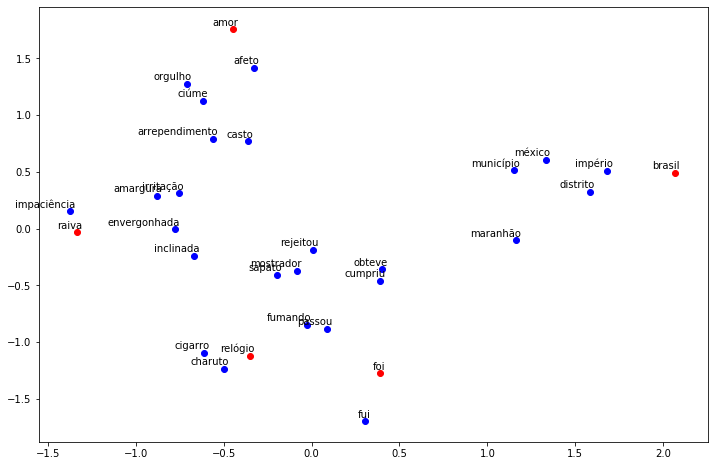

In [ ]:
plot_embedding_2d (pca_result,todas_palavras,palavras_origem)

#### TSNE
<b> Uma técnica mais recente que captura estrutura não linear é o t-SNE, que significa distribuição estocástica de embedding viziznhos em t ( t-distributed Stochastic Neighbor Embedding). 
É uma ótima técnica para capturar a estrutura não linear em dados de alta dimensão(pelo menos em nível local). Isto é, dois pontos que são próximos no espaço de alta dimensão a probabilidade de estarem próximos em uma dimensão baixa é alta. </b>

Mais informações: https://medium.com/@garora039/dimensionality-reduction-using-t-sne-effectively-cabb2cd519b

<b> Atividade </b>

24) Gere a visualização dos embeddings anteriores utilizando o TSNE para reduzir a dimensionalidade.

Exemplo do TSNE:

```python
#uso de TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_result =  tsne.fit_transform(array_embeddings)
```

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_result =  tsne.fit_transform(arry_embeddings)

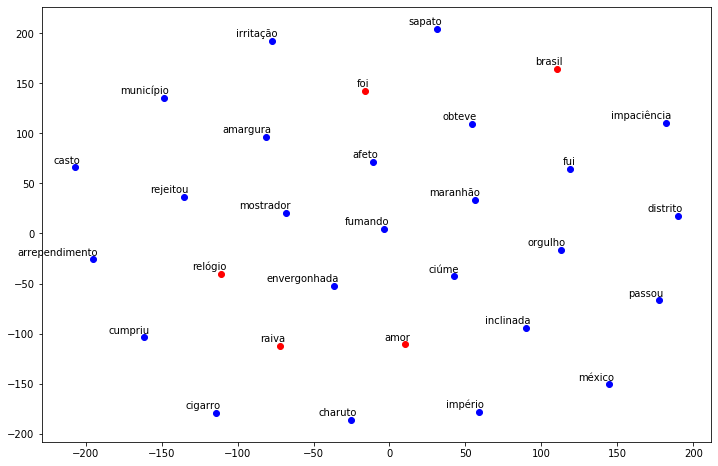

In [ ]:
plot_embedding_2d (tsne_result,todas_palavras,palavras_origem)

#### UMAP

<b> Técnica super nova!! Foi lançada em 2018! Observe que o resultado do UMAP com o TSNE é semelhante. Mas existem várias vantagens do UMAP, por exemplo: é mais rápido que o t-SNE; ele captura melhor a estrutura global </b>

Mais informações: https://medium.com/@dan.allison/dimensionality-reduction-with-umap-b081837354dd

<b> Atividade </b>

25) Gere a visualização dos embeddings anteriores utilizando o UMAP para reduzir a dimensionalidade.

Exemplo do UMAP:

```python
#uso de TSNE
umap = umap.UMAP()
umap_result =  umap.fit_transform(array_embeddings)
```

In [ ]:
umap = umap.UMAP()
umap_result =  umap.fit_transform(arry_embeddings)

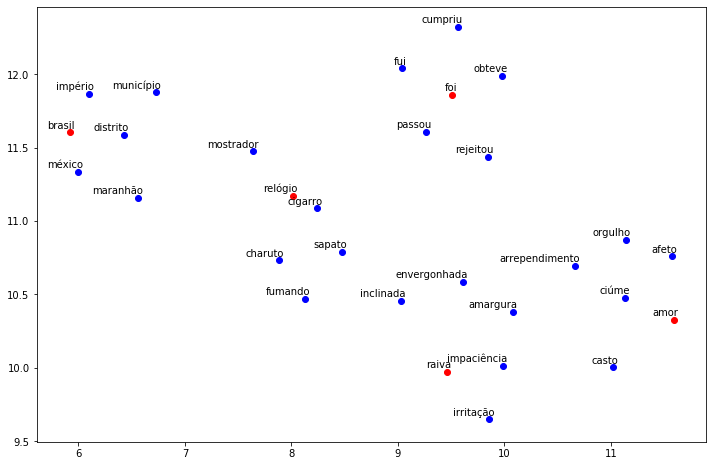

In [ ]:
plot_embedding_2d (umap_result,todas_palavras,palavras_origem)

<b> Atividade </b>

26) Faça uma comparação analisando os método: PCA, TSNE e Umap. Depois da sua análise, informe se teve algum com melhor desempenho.

In [ ]:
"""
Usando uma mesma amostra com as mesmas dimensões podemos comprar as 3 
metodologias de redução dimensional podemos tirar algumas conclusões como o PCA 
possui um algoritmo baseado em projeção linear onde os dados ditos componentes 
principais, onde os fatores, mais próximos de componentes principais são selecionados
e visualizados no gráfico. O TSNE, como dito em sua própria documentação, é uma metodologia
muito custosa em nível de recurso de máquina, se for usado com grandes quantidades de 
dimensões, ele tem uma predição mais efetiva em relação ao PCA porém é, como dito, mais custoso.
Por fim UMAP, com uma metodologia mais acertiva que as outras duas, seu modelo preditivo 
tem um poder de separação e identificação melhor e em termos de performance perde apenas 
para o PCA que executa uma análise mais rápida porém menos efetivo.

O PCA por ser uma projeção linear e ter algoritmos otimizados para performance, ganha dos outros
dois métodos, porém perde em resultado, criando comparações que em alguns casos pode ser 
suficiente e em outros vai acabar por deixar mais complexo e custoso um projeto de predição.
"""